# Notebook Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Preload the Dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Building the Neural Network

In [5]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

## Building the Model 

In [6]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

## Training and evaluating the model

In [7]:
model_history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))

Epoch 1/40
1719/1719 [==============================] - 11s 5ms/step - loss: 0.5542 - accuracy: 0.8080 - val_loss: 0.3877 - val_accuracy: 0.8632
Epoch 2/40
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4077 - accuracy: 0.8544 - val_loss: 0.3518 - val_accuracy: 0.8746
Epoch 3/40
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3652 - accuracy: 0.8699 - val_loss: 0.3383 - val_accuracy: 0.8818
Epoch 4/40
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3396 - accuracy: 0.8776 - val_loss: 0.3267 - val_accuracy: 0.8836
Epoch 5/40
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3205 - accuracy: 0.8840 - val_loss: 0.3280 - val_accuracy: 0.8824
Epoch 6/40
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3058 - accuracy: 0.8872 - val_loss: 0.3204 - val_accuracy: 0.8876
Epoch 7/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2887 - accuracy: 0.8950 - val_loss: 0.3151 - val_accuracy

## Visualization of Model

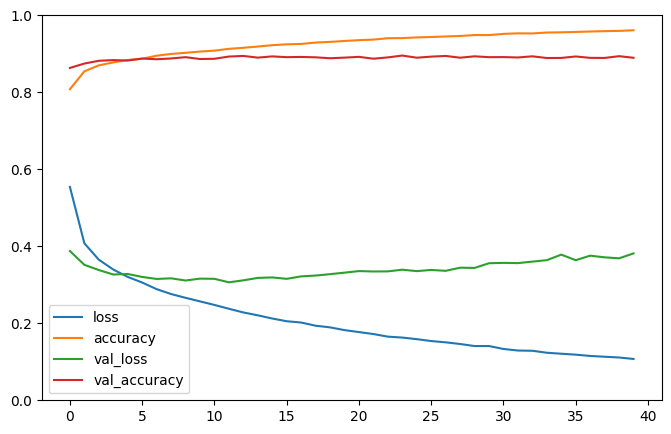

In [8]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.gca().set_ylim(0, 1) 
plt.show()